# Part 5: Recognition

In this part of the assignment, you will practice **object detection** by applying a [pre-trained YOLO model](https://pytorch.org/hub/ultralytics_yolov5/) for object detection on a new dataset. Specifically, you will use a pre-trained YOLO model to detect cars in images derived from video recording of a highway. You will evaluate the model using Intersection over Union (IoU) and recall metrics.

**Learning objectives.** You will:
1. Apply a pre-trained YOLO model for object detection on a new dataset.
2. Evaluate the model using IoU and recall metrics.
3. Consider the ethical implications surrounding bias and privacy for facial recognition software as one example of object detection in the real world.

YOLO (You Only Look Once) is a popular object detection algorithm that is known for its speed and accuracy. YOLO divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell. The model predicts the bounding boxes and class probabilities simultaneously, which makes it faster than other object detection algorithms. YOLO has several versions, such as YOLOv1, YOLOv2, YOLOv3, and YOLOv4. In this assignment, you will use YOLOv5, which is a popular version of the YOLO model. You can [read more about the model and its architecture here](https://docs.ultralytics.com/yolov5/) if you are interested; you will find that it is a deep neural network that uses convolutional layers extensively, among other things.

First, the following code loads the dataset of car images and stores them in a dictionary keyed by the image id.

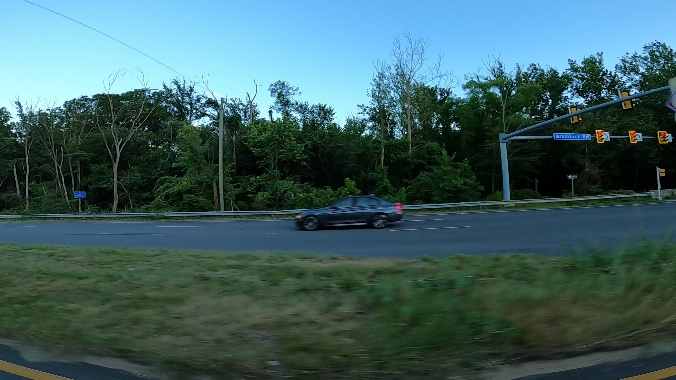

In [1]:
# Run but DO NOT MODIFY this code

# load car images and visualize a sample image
import os
from PIL import Image

# stores images in a dictionary keyed by image_id
path = 'car/car_images'
image_dict = {}
for file in os.listdir(path):
    if file.endswith('.jpg'):
        image_id = file.split('.')[0]
        image = Image.open(os.path.join(path, file))
        image_dict[image_id] = image

image_dict['vid_4_600']

Next, the following code reads the ground truth bounding box information for cars in all of the images. There may be multiple cars in a single image, in which case the dataset has multiple rows, one per car, just sharing the same image id. Images are identified with the same ids as above.

The code as written uses the [Pandas library](https://pandas.pydata.org/). If you prefer not to work with Pandas you are welcome to instead use the Python standard library [csv module](https://docs.python.org/3/library/csv.html) or NumPy to read the data into a structure of your preference.

In [2]:
# load car bounding boxes

import pandas as pd
bounding_boxes = pd.read_csv('car/car_bounding_boxes.csv')
bounding_boxes.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [3]:
pip install --upgrade backports

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement backports (from versions: none)
ERROR: No matching distribution found for backports


In [4]:
pip install backports.tarfile

## Task 1

Below we import a pretrained YOLO model. If you are unable to load the model due to a missing dependency (for example, the model needs access to the `cv2` module for computer vision) then you can try running the following command in a separate notebook cell by itself to attempt to install the dependencies: `pip install -U ultralytics`.

In [5]:
# load pre-trained Yolo model

import torch
import warnings
warnings.filterwarnings("ignore")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\micha/.cache\torch\hub\ultralytics_yolov5_master


WARNING  invalid check_version(None, >=1.4.1) requested, please check values.


YOLOv5  2024-10-17 Python-3.11.5 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Once you have loaded the model, use it on any image containing at least one car. Visualize the predicted bounding box on the image. You can see an [example of the basic model usage here](https://pytorch.org/hub/ultralytics_yolov5/#load-from-pytorch-hub); note that running the model returns a custom results object that can be visualized directly with `.show()`.

WARNING  invalid check_version(None, >=1.4.1) requested, please check values.


Using cache found in C:\Users\micha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-17 Python-3.11.5 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


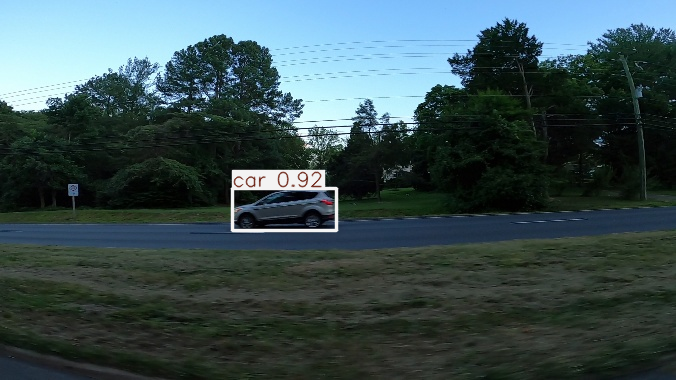

In [6]:
import os
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the pre-trained YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

results = model(image)  

boxes = results.xyxy[0].cpu().numpy() 

results = model(image)
results.show()


## Task 2

The standard way to measure the correctness of a bounding box prediction in object detection is the intersection-over-union (IoU). Given a ground truth bounding box $B$ and a predicted bounding box $\hat{B}$, the IoU is the area of the *intersection* of $B$ and $\hat{B}$ (the number of pixels included in both) divided by the *union* of $B$ and $\hat{B}$ (the total number of pixels included in either). IoU should always be a value between 0 and 1, with larger scores indicating better bounding box predictions.

For this task, implement the `intersect_over_union` function below to calculate the IoU metric. You should then **test your implementation** before moving on, reporting at least 3 examples used for testing.

In [13]:
# write code for task 2 here 

def intersect_over_union(ground_truth, pred):
    # input given as tuple of (x1, y1, x2, y2) where
    # (x1, y1) are the coordinates of the top left corner,
    # (x2, y2) are the coordinates of the bottom right corner.

    x1_gt, y1_gt, x2_gt, y2_gt = ground_truth
    x1_pred, y1_pred, x2_pred, y2_pred = pred

    x1_inter = max(x1_gt, x1_pred)
    y1_inter = max(y1_gt, y1_pred)
    x2_inter = min(x2_gt, x2_pred)
    y2_inter = min(y2_gt, y2_pred)

    intersection_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    area_gt = (x2_gt - x1_gt) * (y2_gt - y1_gt)
    area_pred = (x2_pred - x1_pred) * (y2_pred - y1_pred)

    union_area = area_gt + area_pred - intersection_area
    iou = intersection_area / union_area if union_area > 0 else 0

    return iou


In [18]:
# write code for task 2 here to test function
# report at least 3 examples used for testing

test_cases = [
    # Full overlap
    ((0, 0, 4, 4), (0, 0, 4, 4)),  
    # No overlap
    ((0, 0, 2, 2), (3, 3, 5, 5)),  
    # Partial overlap
    ((0, 0, 4, 4), (2, 2, 6, 6)),  
]

for i, (gt, pred) in enumerate(test_cases, 1):
    iou_value = intersect_over_union(gt, pred)
    print(f'Test Case {i}: IoU = {iou_value:.6f}')

Test Case 1: IoU = 1.000000
Test Case 2: IoU = 0.000000
Test Case 3: IoU = 0.142857


## Task 3

Evaluate the YOLO model by computing and reporting the **recall** of the model's bounding box predictions for cars (and only cars) on the entire dataset. Recall that the recall is the fraction of cars that are correctly detected by the model. A couple things to note:

1. There may be multiple ground truth cars in a given image. When there are multiple cars in a given image, treat each one separately, so that the recall is over all appearances of cars in all images in the dataset.
2. Use the intersection over union metric to determine if a car is correctly detected. Specifically, consider a prediction to be a true positive if the IoU is at least $0.5.$

In [19]:
# Write code for task 3 here

TP = 0
FN = 0

path = 'car/car_images'
for image_id, group in bounding_boxes.groupby('image'):
    image_path = os.path.join(path, image_id)
    image = Image.open(image_path)
    
    results = model(image)
    
    pred_boxes = results.xyxy[0].cpu().numpy()  
    pred_cars = pred_boxes[pred_boxes[:, -1] == 2]  
    gt_boxes = group[['xmin', 'ymin', 'xmax', 'ymax']].values.tolist()
    
    # Track matches
    matched = [False] * len(gt_boxes)  

    for pred in pred_cars:
        pred_box = pred[:4]  
        
        for i, gt in enumerate(gt_boxes):
            iou = intersect_over_union(gt, pred_box)
            if iou >= 0.5 and not matched[i]:  
                TP += 1
                matched[i] = True
                break  

    FN += len(gt_boxes) - sum(matched)

recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f'True Positives (TP): {TP}, False Negatives (FN): {FN}')
print(f'Recall for car detection: {recall:.4f}')

True Positives (TP): 525, False Negatives (FN): 34
Recall for car detection: 0.9392


## Task 4

You may have heard of **facial recognition** software: These are essentially models for object detection and recognition that are trained to detect and recognize human faces. Such models have been deployed in law enforcement and, for example, [US Customs when entering the country](https://www.cbp.gov/travel/biometrics).

Such adoption has happened despite serious ethical objections concerning bias and privacy. For example, [Gender Shades by Buolamwini and Gebru, 2018](https://proceedings.mlr.press/v81/buolamwini18a.html) was a landmark audit study of commercially available facial recognition software that demonstrated substantial disparities in performance based on skin color. 

In 2021, Marks observes in a [Communications of the ACM Article](https://cacm.acm.org/news/can-the-biases-in-facial-recognition-be-fixed-also-should-they/) cases of individuals wrongly accused of crimes on the basis of facial recognition software, including software developed using 2.8 billion scraped images from social media without user permission, raising further questions about privacy. 

Of course, others might argue that properly trained and debiased models might be used to build a safer (by helping to find criminal suspects) or more convenient society (replacing, for example, paper passports). Walsh, in a [2022 article](https://cacm.acm.org/opinion/the-troubling-future-for-facial-recognition-software/) considers a variety of perspectives including the threat of constant surveillance but also the potential for applications of societal benefit.

In 2-3 paragraphs, take a position on the question "Should governments use facial recognition software?" You might argue yes for some purposes but no for others, or that it depends on how the technology is developed or regulated; explain your view referencing any of the above articles or other sources of your own choosing.

We believe that governments using facial recognition software is for the worse of society for three key reasons: Facial recognition software unlevels the playing field between the average person and law enforcement beyond the scope of reasonable fairness, promotes a dangerous standard for the evaluation of evidence in courts of law, and is ethically repulsive in regards to a human-right of charitable interpretation and privacy.

The first of these reasons is that facial recognition accomplishes tasks that would be otherwise impossible for humans. The Walsh article cites an example of a camera and facial recognition software being able to identify one protestor amongst a horde of 6000 people. This kind of power being given to law enforcement agencies makes it such that law enforcement agencies are able to place an undue threat on individuals that would have otherwise been impossible discouraging and potentially threatning the power and right to assembly.

This leads me to the next reason which is that facial recognition software is a threat to privacy. Facial recognition ingests the personal image and likeness if the observed often without expressly given consent (in the case of U.S Customs it works by lack of objection) and with a frequent lack of transparency in the process of using this data and how its analyzed the observed often have little say into how theur likeness is being used and stored and for how long. Finally, apart from the articles, it is our belief that facial recogntion sets a dangerous precedent for technology in court. If facial recognition software is used to evaluate evidence but judges and jury are not trained in the methods used, they are unable to adequately interpret the data. This increases the liklihood of wrong decision making, which is all around negative for facial recognition software.